In [1]:
import tensorflow as tf

datadir = "/Users/alison/Documents/DPhil/multivariate/"
import numpy as np
from hazardGAN import utils
from importlib import reload
import matplotlib.pyplot as plt

Metal device set to: Apple M2


In [4]:
marginal_windows = utils.sliding_windows(marginals_train, window, jump)
marginal_windows.shape

(993, 7, 20, 24, 1)

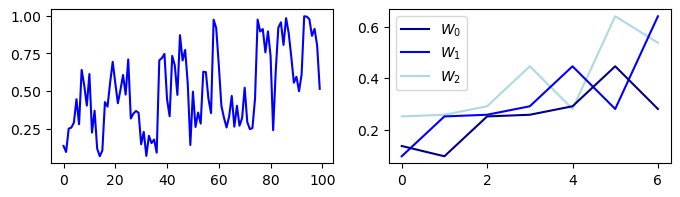

In [7]:
reload(utils)
window = 7
jump = 1
res = utils.load_training_data(datadir,
                                datas=['wind_data'],
                                train_size=100,
                                evt_type='bm',
                                shuffle=False)
marginals_train, marginals_test, params, images, thresholds = res
marginal_windows = utils.sliding_windows(marginals_train, window, jump)

fig, axs = plt.subplots(1, 2, figsize=(8, 2))

axs[0].plot([*range(100)], marginals_train[:, 2, 10, 0], color='blue')
axs[1].plot([*range(7)], marginal_windows[0, :, 2, 10, 0], label=r'$W_0$', color='darkblue', zorder=2)
axs[1].plot([*range(7)], marginal_windows[1, :, 2, 10, 0], label=r'$W_1$', color='blue', zorder=1)
axs[1].plot([*range(7)], marginal_windows[2, :, 2, 10, 0], label=r'$W_2$', color='lightblue', zorder=0)
axs[1].legend(loc='upper left')

In [10]:
dataset = tf.data.Dataset.from_tensor_slices(marginal_windows).batch(50)
first_batch = next(iter(dataset))
first_batch.shape

TensorShape([50, 7, 20, 24, 1])

In [20]:
import os
import wandb
import hazardGAN
import matplotlib.pyplot as plt

from importlib import reload
reload(hazardGAN)

wd = "/Users/alison/Documents/DPhil/multivariate/hazardGAN"

RUNNAME = 'tough-paper-11' #'solar-wind-126' ##'icy-frog-125' # 'solar-sweep-1' # 'leafy-plant-114'
evt_type = 'bm'
pot = (evt_type == "pot")

os.chdir(os.path.join(wd, 'saved-temporal-models', evt_type, RUNNAME))

wandb.init(project='test', mode='disabled')
config = wandb.config
dcgan = hazardGAN.tDCGAN.compile_dcgan(config, nchannels=1)
dcgan.generator.load_weights(os.path.join(wd, 'saved-temporal-models', evt_type, RUNNAME, f'generator_weights'))
generated = dcgan(1)

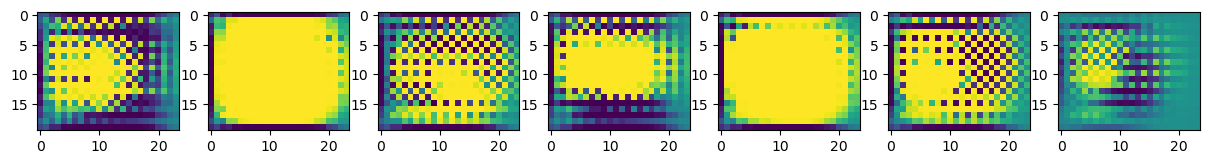

In [21]:
n, T, h, w, c = generated.shape

channel = 0

fig, axs = plt.subplots(1, T, figsize=(15, 3))
for t in range(T):
    axs[t].imshow(generated[0, t, ..., channel])

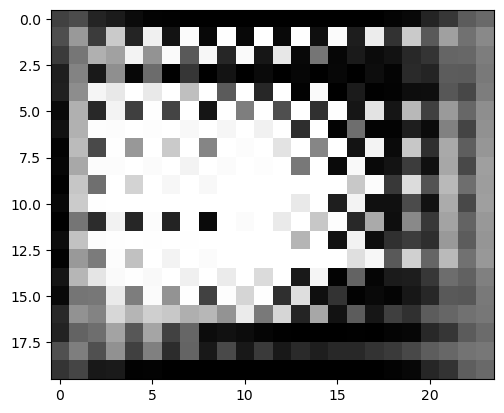

In [22]:
from matplotlib.animation import FuncAnimation

def update_plot(frame):
    plt.clf()  # clear the previous plot
    plt.imshow(generated[0, frame, ..., 0], cmap='gray')  # plot the current frame
    
fig = plt.figure()
ani = FuncAnimation(fig, update_plot, frames=generated.shape[1], interval=100)

ani.save('/Users/alison/Desktop/animation.gif')